<a href="https://colab.research.google.com/github/thatvernon-yes/CCMACLRL_PROJECT_COM222/blob/main/ML_finals_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Car Carbon Dioxide Emission based on  its Performance Feature using Multiple Linear Regression and Random Forest Model




#Imports

In [454]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings as wrn
wrn.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Dataset File

In [455]:
df = pd.read_csv("Emissions.csv")

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [457]:
df.shape

(7385, 12)

In [458]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [459]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [460]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#Exploratory Data Analysis

###Make Column

In [461]:
len(df['Make'].unique())

42

In [462]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

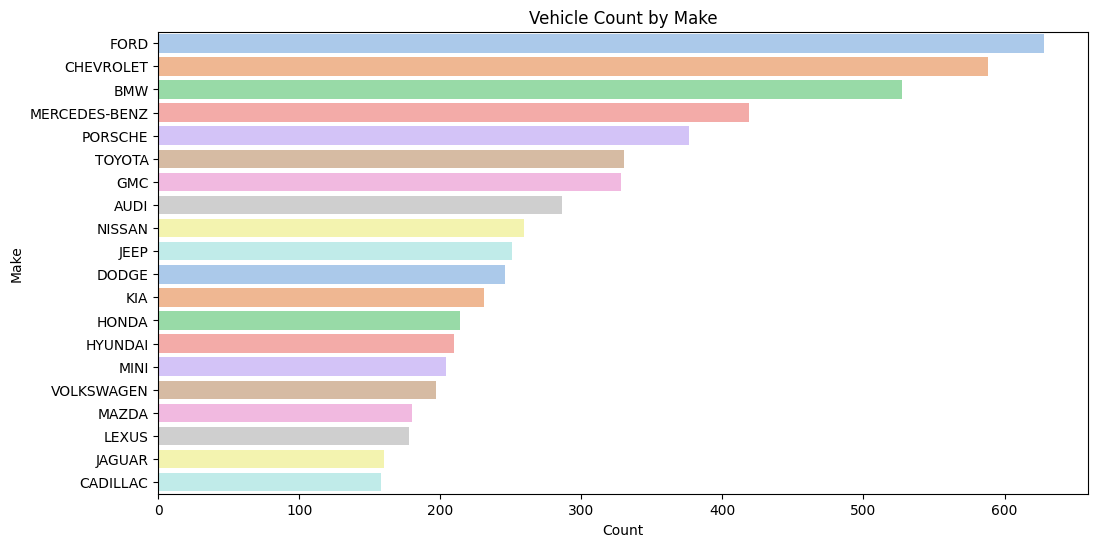

In [463]:
plt.figure(figsize=(12, 6))

# display the top 20 Makes

top_makes = df['Make'].value_counts().head(20).index
sns.countplot(y='Make', data=df, order=top_makes, palette="pastel")

plt.title('Vehicle Count by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

###Model Column

In [464]:
df['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

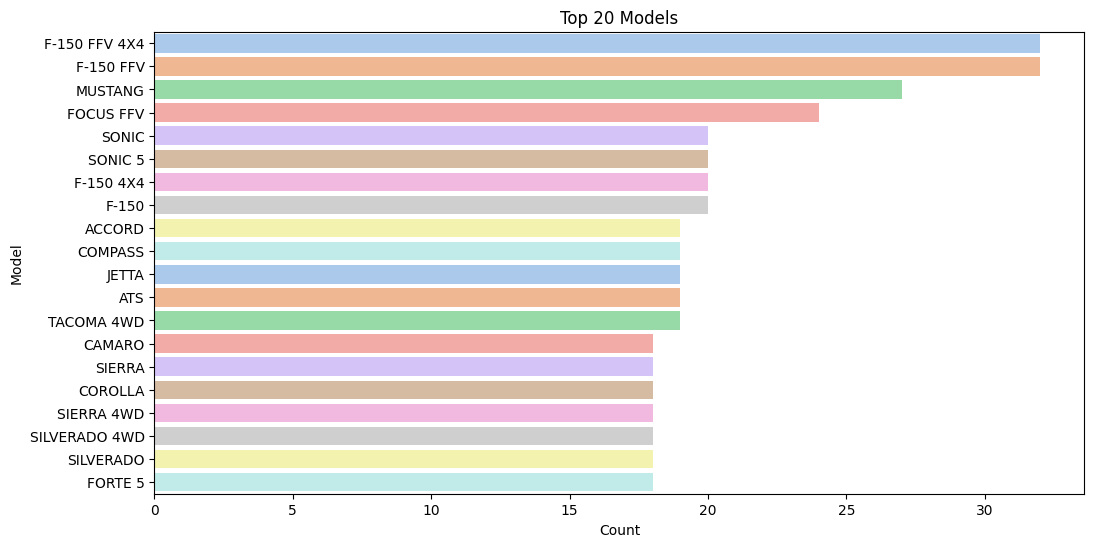

In [465]:
# display the top 20 Models base on entry count

top_models = df['Model'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_models.index, x=top_models.values, palette="pastel")
plt.title('Top 20 Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

###Vehicle Class Column

In [466]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

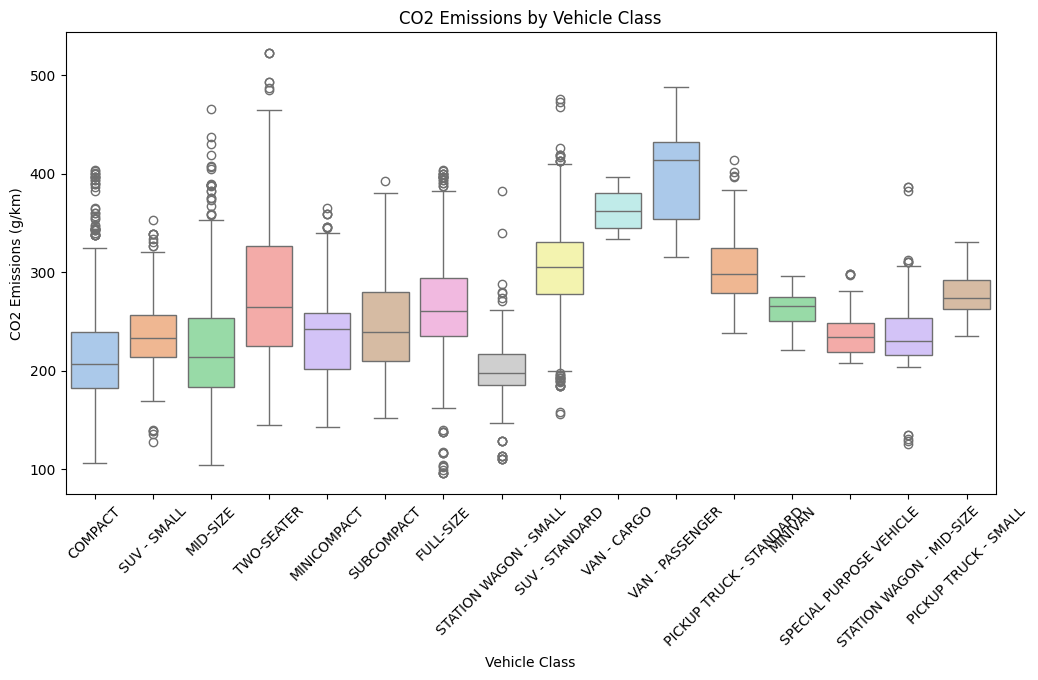

In [467]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions by Vehicle Class

sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df, palette="pastel")
plt.title('CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

###Engine Size Column

In [468]:
df['Engine Size(L)'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

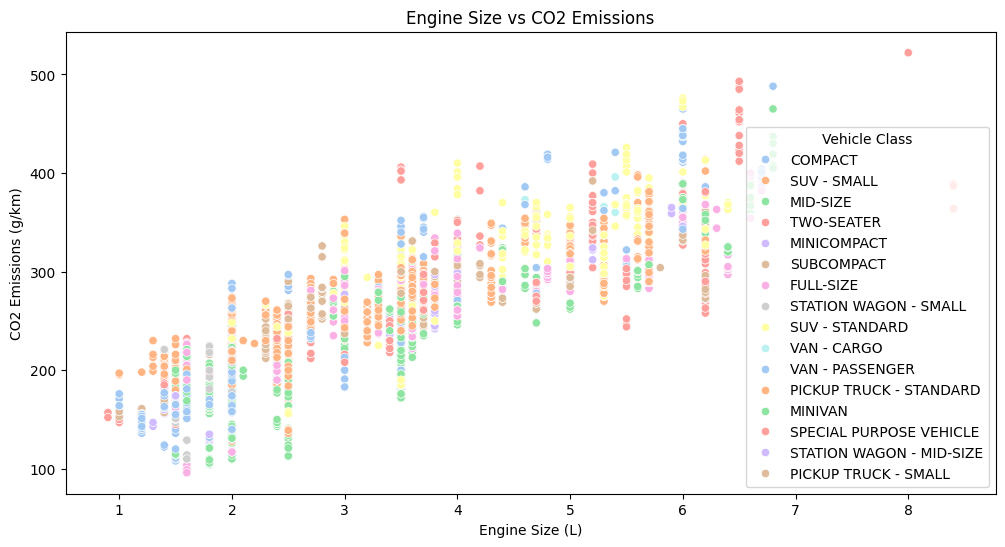

In [469]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Engine Size

sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df, hue='Vehicle Class', palette="pastel")
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()


###Cylinders Column

In [470]:
df['Cylinders'].value_counts()

,count
Cylinders,
4,3220
6,2446
8,1402
12,151
3,95
10,42
5,26
16,3


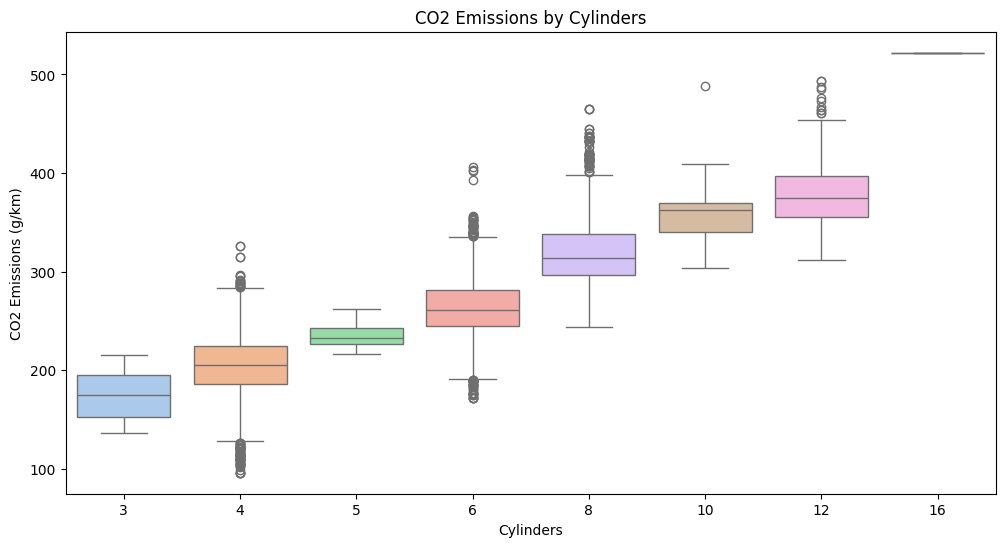

In [471]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Cylinders

sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=df, palette="pastel")
plt.title('CO2 Emissions by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

###Transmission Column

In [472]:
df['Transmission'].value_counts()

,count
Transmission,
AS6,1324
AS8,1211
M6,901
A6,789
A8,490
AM7,445
A9,339
AS7,319
AV,295


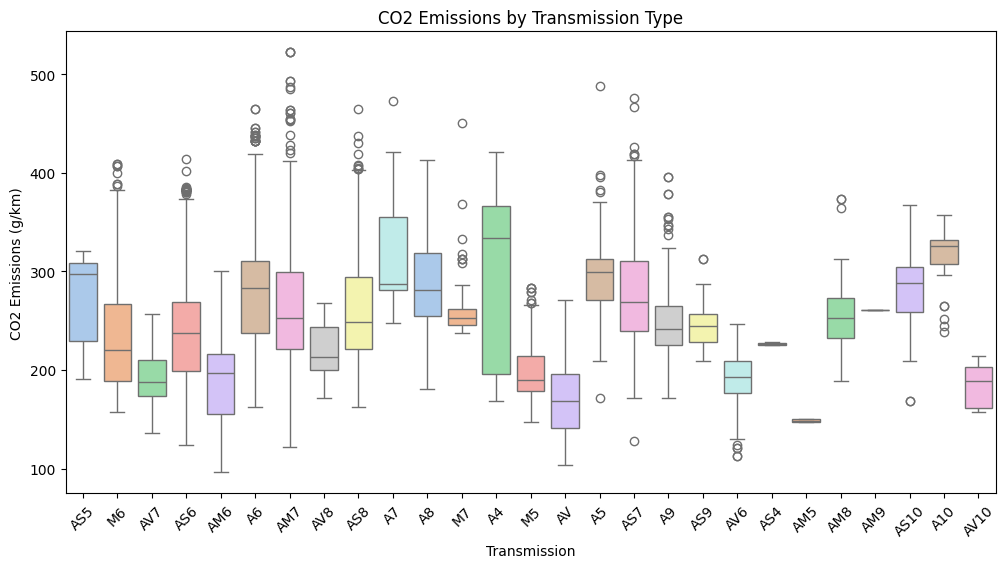

In [473]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Transmission
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=df, palette="pastel")
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

###Fuel Type Column

In [474]:
df['Fuel Type'].value_counts()

,count
Fuel Type,
X,3637
Z,3202
E,370
D,175
N,1


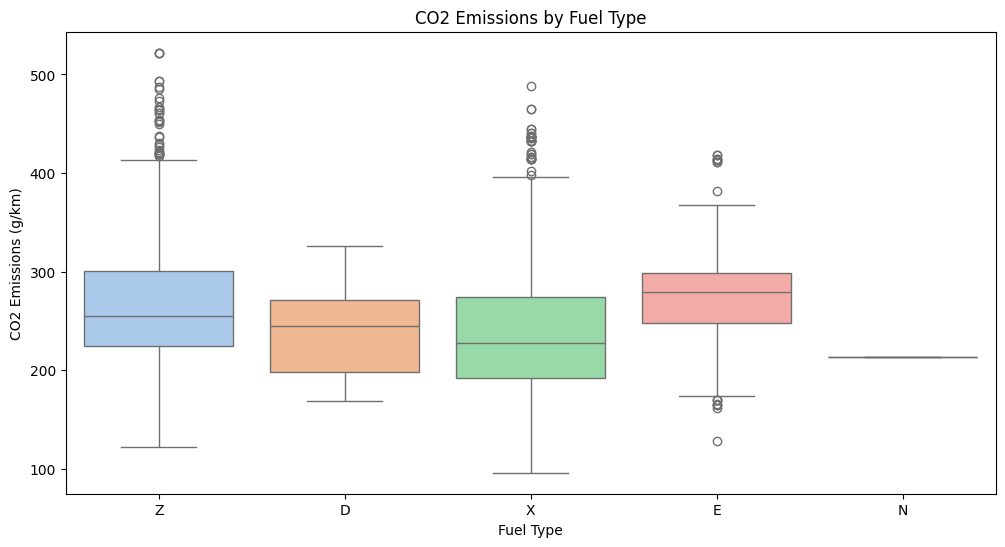

In [475]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Fuel Type

sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df, palette="pastel")
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

###CO2 Emmisions

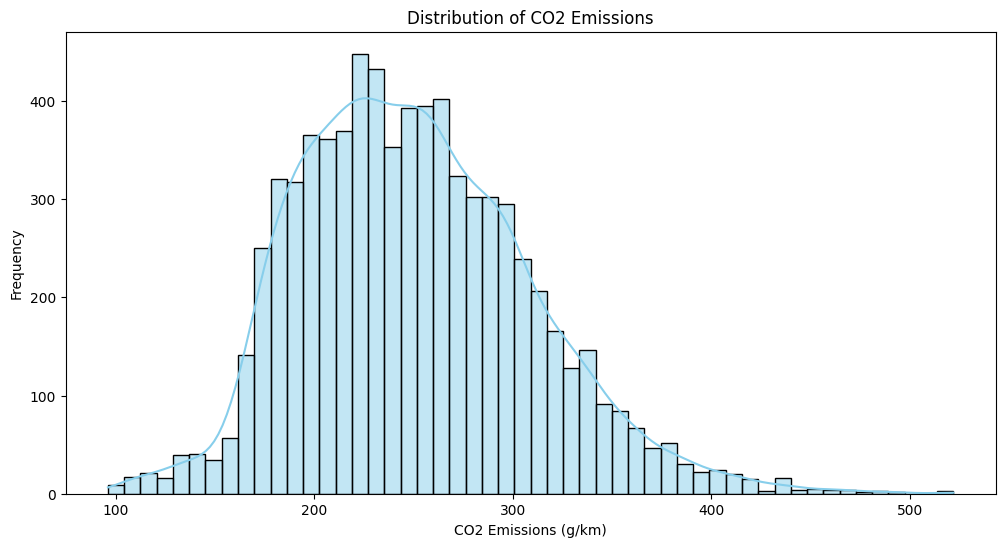

In [476]:
plt.figure(figsize=(12, 6))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, color='skyblue')
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

##Statistics

In [477]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


###Pair plot

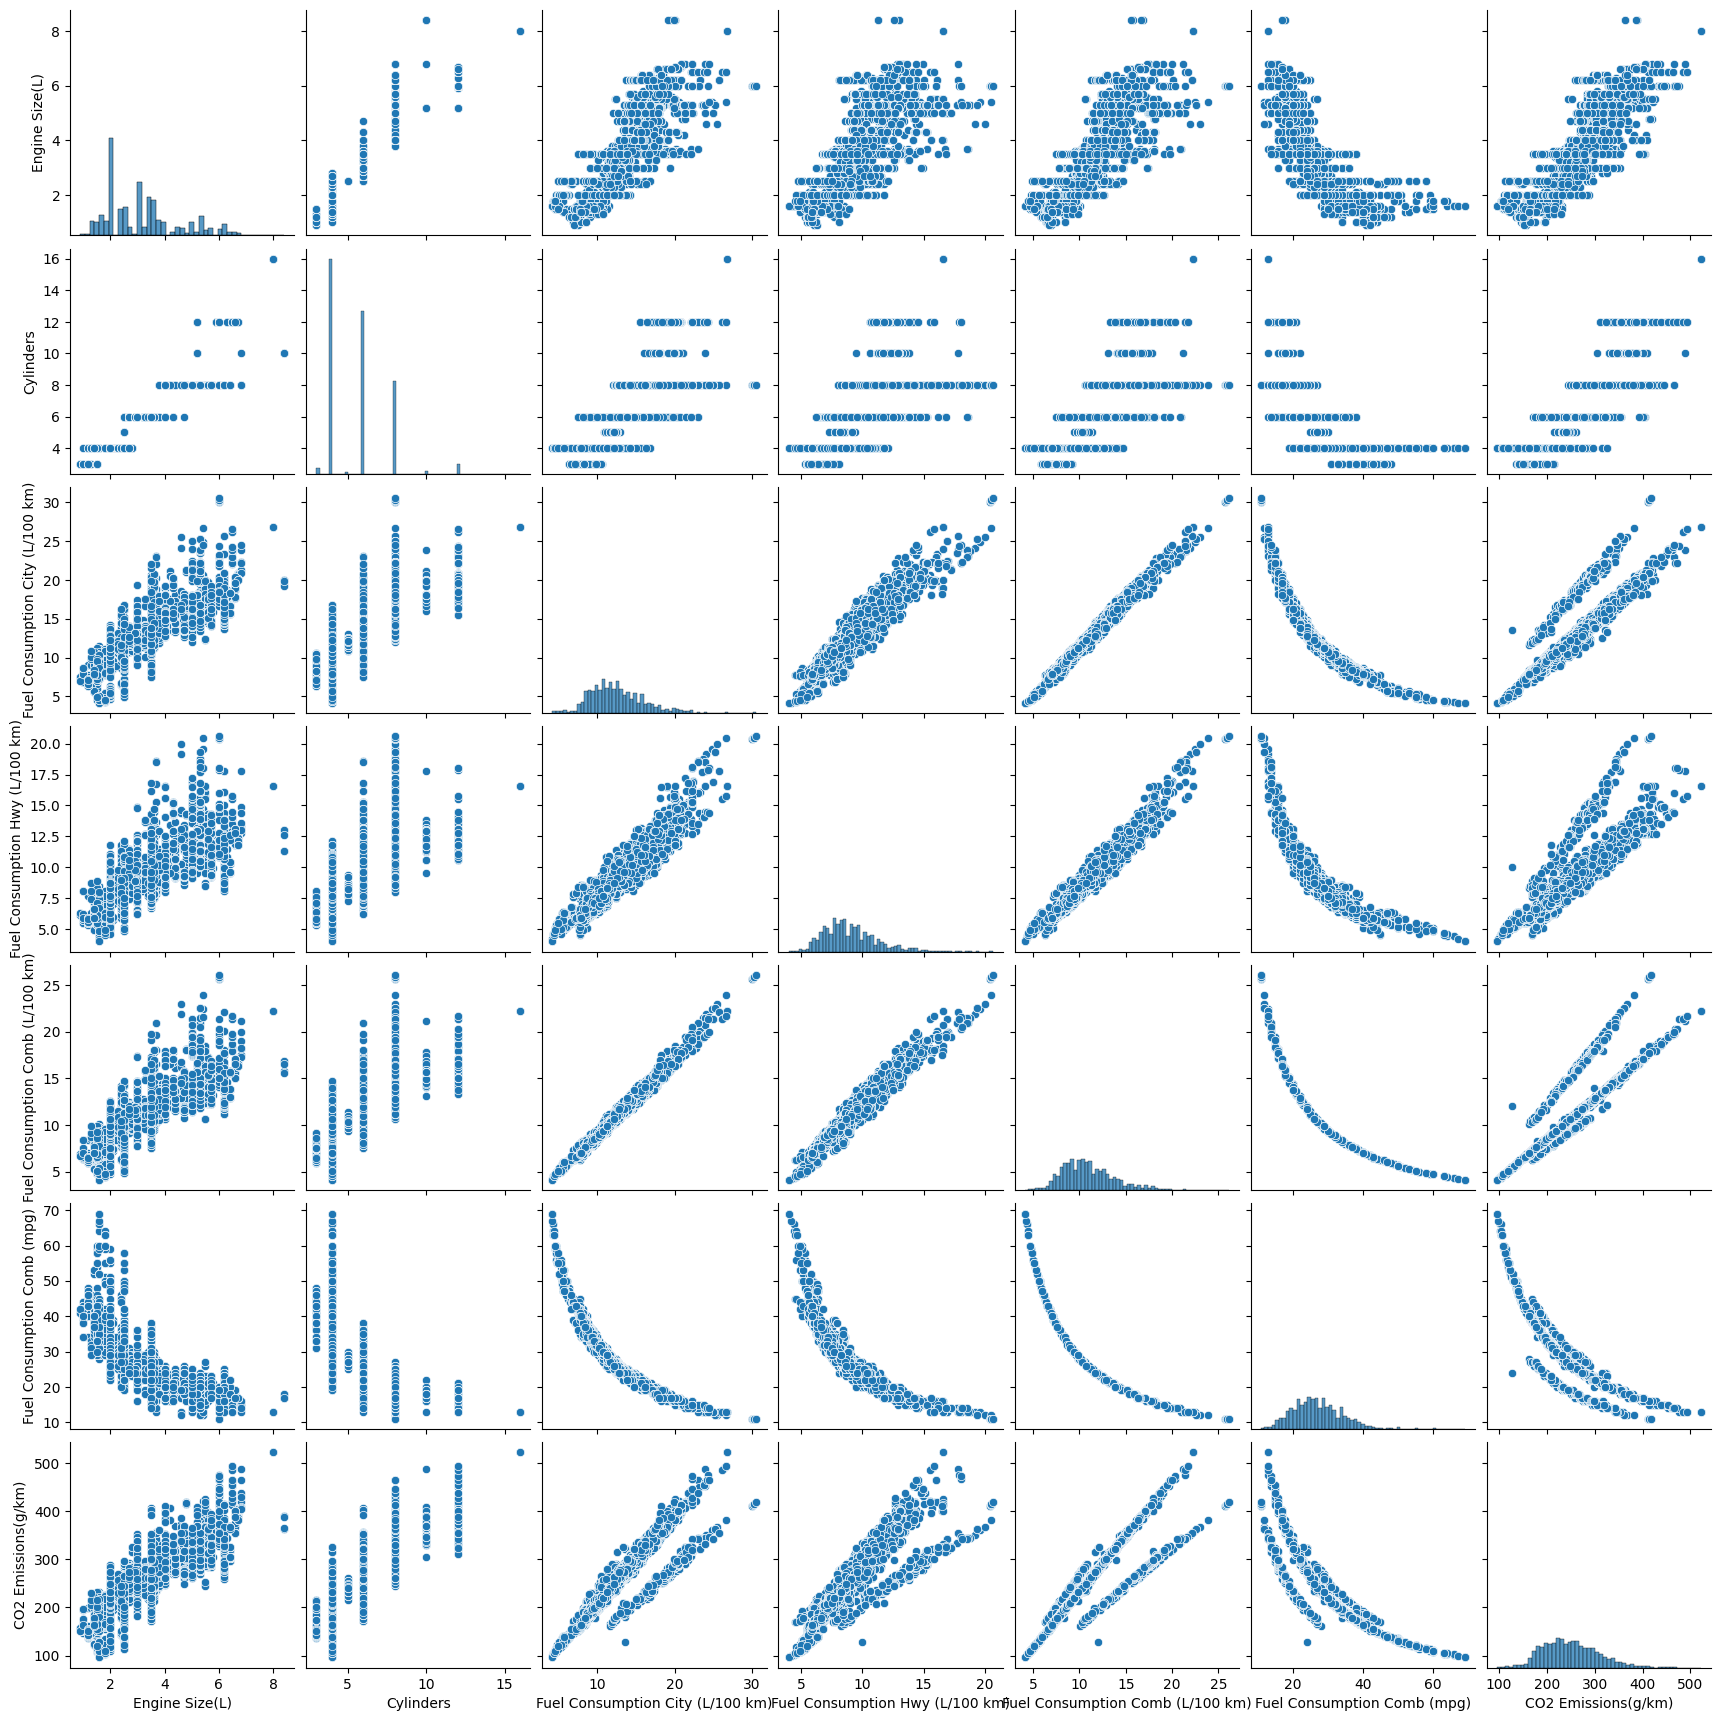

In [478]:
sns.pairplot(df)

In [479]:
label_encoder = LabelEncoder()

df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Vehicle Class'] = label_encoder.fit_transform(df['Vehicle Class'])

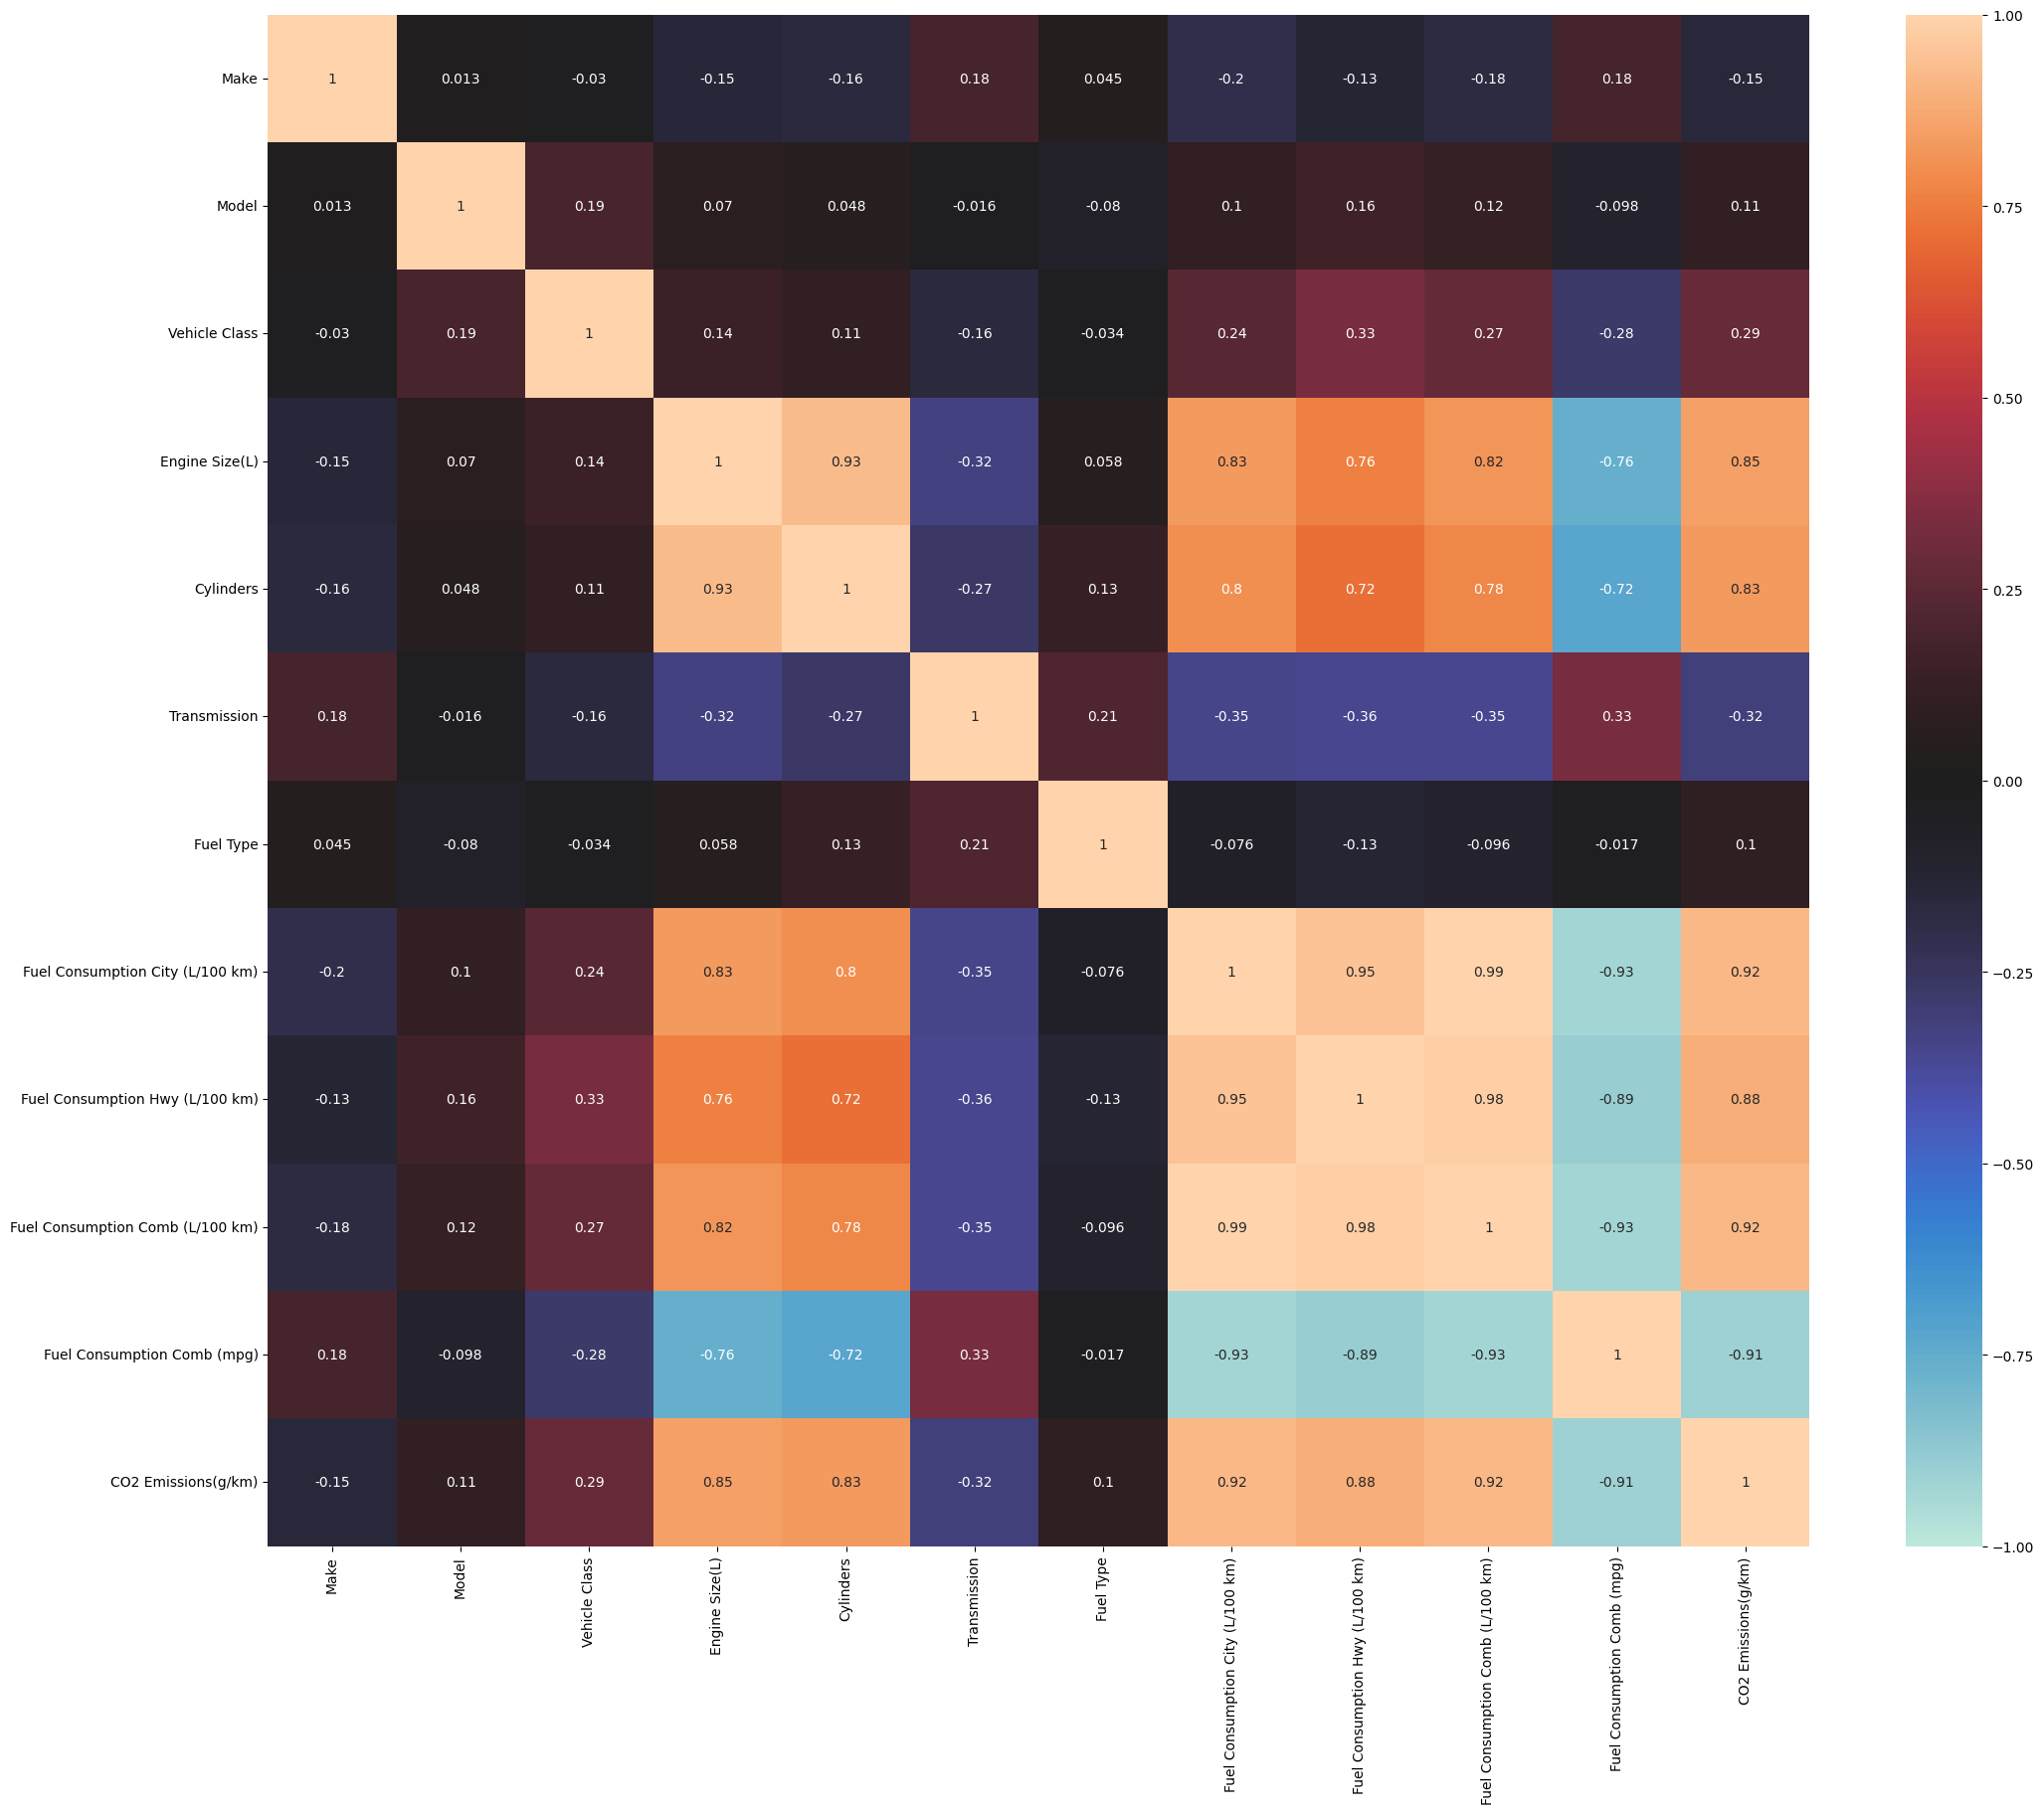

In [480]:
correlation = df.corr()
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

#Pre-processing

##Remove Duplicates

In [481]:
df.duplicated().sum()

1103

In [482]:
df[df.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
1076,0,1510,2,3.5,6,15,4,11.9,7.7,10.0,28,230
1081,1,113,13,1.8,4,8,4,9.7,6.9,8.4,34,193
1082,2,708,3,5.9,12,3,4,18.0,12.6,15.6,18,359
1084,2,1866,13,4.7,8,9,4,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,39,1850,6,5.7,8,15,3,17.7,13.6,15.9,18,371
7365,40,1022,0,2.0,4,25,3,9.8,7.3,8.7,32,203
7366,40,1107,0,1.4,4,17,3,7.8,5.9,7.0,40,162
7367,40,1107,0,1.4,4,25,3,7.9,5.9,7.0,40,163


In [483]:
# remove duplicated data but keep the first one

df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [484]:
df.duplicated().sum()

0

In [485]:
df.shape

(6282, 12)

##Check For Missing Data

In [486]:
df.isnull().values.any()

False

In [487]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [488]:
df.shape

(6282, 12)

##Renaming Columns

In [489]:
# rename columns

df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

##Label Encoder

In [490]:
# label_encoder = LabelEncoder()

# Fit the encoder and store the mapping
# make_mapping = dict(zip(label_encoder.fit(df['make']).classes_, label_encoder.transform(label_encoder.classes_)))
# model_mapping = dict(zip(label_encoder.fit(df['model']).classes_, label_encoder.transform(label_encoder.classes_)))
# vehicle_class_mapping = dict(zip(label_encoder.fit(df['vehicle_class']).classes_, label_encoder.transform(label_encoder.classes_)))
# transmission_mapping = dict(zip(label_encoder.fit(df['transmission']).classes_, label_encoder.transform(label_encoder.classes_)))
# fuel_type_mapping = dict(zip(label_encoder.fit(df['fuel_type']).classes_, label_encoder.transform(label_encoder.classes_)))

# df['make'] = label_encoder.fit_transform(df['make'])
# df['model'] = label_encoder.fit_transform(df['model'])
# df['transmission'] = label_encoder.fit_transform(df['transmission'])
# df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
# df['vehicle_class'] = label_encoder.fit_transform(df['vehicle_class'])

In [491]:
label_encoder = LabelEncoder()

df['make'] = label_encoder.fit_transform(df['make'])
df['model'] = label_encoder.fit_transform(df['model'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['vehicle_class'] = label_encoder.fit_transform(df['vehicle_class'])

##Label Encoding Map

In [492]:
# print("Label Mapping for Make:\n")
# for make_label, encoded_label in make_mapping.items():
#     print(f"{encoded_label} - {make_label}")

In [493]:
# print("Label Mapping for Model:\n")
# for model_label, encoded_label in model_mapping.items():
#     print(f"{encoded_label} - {model_label}")

In [494]:
# print("Label Mapping for Vehicle Class:\n")
# for class_label, encoded_label in vehicle_class_mapping.items():
#     print(f"{encoded_label} - {class_label}")

In [495]:
# print("Label Mapping for Fuel Type:\n")
# for fuel_label, encoded_label in fuel_type_mapping.items():
#     print(f"{encoded_label} - {fuel_label}")

In [496]:
# print("Label Mapping for Transmission:\n")
# for trans_label, encoded_label in transmission_mapping.items():
#     print(f"{encoded_label} - {trans_label}")

##Dropping Columns

In [497]:
# remove unimportant columns
df.drop(['make', 'model'], axis = 1, inplace = True)

In [498]:
# remove the lowest score category base on heatmap
df.drop(['transmission', 'fuel_type','vehicle_class'], axis = 1, inplace = True)

In [499]:
df.head()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


##Score List

In [500]:
score_list = {} #for saving score variables into it

##Train Test Split

In [501]:
X = df.drop(['co2'],axis=1)
# X = sm.add_constant(X)

y = df['co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Multiple Linear Regression

In [502]:
mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)
y_pred = mlr_model.predict(X_train)

lr_score = mlr_model.score(X_test,y_test)
score_list["MLR"] = lr_score

print(f"Score is {lr_score}")

Score is 0.9005609960360276


In [503]:
# cross validation
scores = cross_val_score(mlr_model, X, y, cv=5)
print(scores)
print(scores.mean())

[0.88431844 0.87322684 0.91012437 0.91112573 0.92630273]
0.9010196205896623



#Random Forest Regression

In [504]:
rfc = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=42)

rfc.fit(X_train,y_train)

# Obtain the OOB error
oob_error = 1 - rfc.oob_score_

rfc_score = rfc.score(X_test,y_test)

score_list["RF"]=rfc_score
score_list["RF-OOB"]=rfc.oob_score_

print(f"Score is {rfc_score}")

# Print the OOB error
print(f'OOB score: {rfc.oob_score_}')
print(f'OOB error: {oob_error}')

Score is 0.9761429084658162
OOB score: 0.9802080533652083
OOB error: 0.01979194663479167


In [505]:
# cross validation
scores = cross_val_score(rfc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.93312478 0.97583393 0.98320818 0.97883588 0.98009092]
0.9702187396077868


#Compare the performance of MLR and RFR

In [506]:
score_list = list(score_list.items())

In [507]:
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:6]} ")

MLR Score is 0.9005 
RF Score is 0.9761 
RF-OOB Score is 0.9802 


# Predicting CO2 Emissions using Different Models

In [515]:
# Run this cell to check the predictions (Must have Run all the cell above this first)

sample = df.sample(n=1).values
sample_diff = sample[:, :-1]
mlr_pred = mlr_model.predict(sample_diff)
rfr_pred = rfc.predict(sample_diff)

print(sample_diff)
print("CO2 should be: ",sample[0, -1])
print()

print(f"""Multiple Linear Regression prediction:
    A vehicle with engine size of {sample[0, 0]}, with {sample[0, 1]} number of cylinders,
    that consumes {sample[0, 2]} L/100km fuel in the city and consumes {sample[0, 3]} L/100km fuel in Highway, emits {mlr_pred} CO2
        """)
print(f"""Random Forest prediction:
    A vehicle with engine size of {sample[0, 0]}, with {sample[0, 1]} number of cylinders,
    that consumes {sample[0, 2]} L/100km fuel in the city and consumes {sample[0, 3]} L/100km fuel in Highway, emits {rfr_pred} CO2
        """)

[[ 4.   8.  15.5 10.6 13.3 21. ]]
CO2 should be:  313.0

Multiple Linear Regression prediction:
    A vehicle with engine size of 4.0, with 8.0 number of cylinders,
    that consumes 15.5 L/100km fuel in the city and consumes 10.6 L/100km fuel in Highway, emits [305.66088174] CO2
        
Random Forest prediction:
    A vehicle with engine size of 4.0, with 8.0 number of cylinders, 
    that consumes 15.5 L/100km fuel in the city and consumes 10.6 L/100km fuel in Highway, emits [310.91] CO2
        
